In [3]:
import glob, os #to work with paths
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt # roughly ~base R plotting functionality
import pandas as pd #roughly ~base R & tidyr functionality 
import seaborn as sns #roughly ~ggplot2 functionality
import scipy.stats  as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as smstats

from fuzzywuzzy import fuzz
import warnings
warnings.filterwarnings('ignore')

#to make the plots appear inline, and saved in notebook:
%matplotlib inline
sns.set_context("talk") # seaborn function to make plots according to purpose (talk, paper, poster, notebook)

# We'll show people what version we use
import sys
print('Matplotlib Version: ' + mpl.__version__)
print('NumPy Version: ' + np.version.full_version)
print('Pandas Version:', pd.__version__)
print('Python Version: ' + sys.version)

import datetime
now  = datetime.datetime.now().isoformat()
print('Ran on ' + now)

Matplotlib Version: 3.2.1
NumPy Version: 1.18.4
Pandas Version: 1.0.3
Python Version: 3.8.2 (default, Apr 27 2020, 15:53:34) 
[GCC 9.3.0]
Ran on 2020-07-16T20:01:14.518573


In [27]:
!ls data #we can use shell commands to see where the data is (ls=dir on windows)

5601ab2ea66d100012d5c38a.csv  5df6b530c0b81f49ab5e86fd.csv
57587643e8feea0006ef86ae.csv  5e0fb56452f9e6000e679983.csv
577952778b3e2300016d6acf.csv  5e14ef83c12a36b08f3a1162.csv
57bdba0770808a00012d9810.csv  5e187d0c12135b000c490149.csv
585cd133d22a5800014c4ae0.csv  5e20cfd50020333e55f37e57.csv
58d284e4bfaa440001d1f09b.csv  5e355ebb922af3508c1df891.csv
591c5b73c3d4f6000105719b.csv  5e396942bf69e11731e9bfc7.csv
59c3cfd7754a19000111ca78.csv  5e39e1774531881fce6f353a.csv
59d68c3fe776fd00015ec519.csv  5e42a6f012145b000abd2b14.csv
5a4a8802817d1800018d2549.csv  5e46d130954b011968fcc862.csv
5a97ed1d1eda410001364e94.csv  5e4feb8037713502e9ed364b.csv
5ad543b46e74be00014e63ed.csv  5e50621043a1fb0b5b56b4b2.csv
5b1d61f38ee548000112a47a.csv  5e56590389b924000c184113.csv
5b371acb06f9f90001fb5bdb.csv  5e7fb4743c00ce69510024fb.csv
5b6dbe6d5729b200016a542d.csv  5e85920945c5ca17c7fcc9a4.csv
5b6f0cfd5035e100019cc46e.csv  5e879ef6785373412156181e.csv
5b8ed93eb789f0000174011c.csv  5e8b85e242328d056a6fb6e2.c

In [4]:
df = pd.DataFrame()
solvdf = pd.DataFrame()

all_files = glob.glob(os.path.join('data', "*.csv"))# get list of individual data files


print(len(all_files), 'files')

for i, f in enumerate(all_files):
    #print(f)
    thisdf = pd.read_csv(f)
    if (int(thisdf[thisdf.test_part.isin(['chineseprior'])].button_pressed.values[0]) == 0):
        print('skipped')
        continue
    
    thisdf['ProlificId'] = thisdf.subject
    thisdf.subject = i+1
    
    thissolvdf = thisdf[thisdf.test_part.isin(['solvability'])]
    thisdf = thisdf[thisdf.test_part.isin(['affect', 'target'])]
    #print(len(thisdf))
    #thisdf = preprocess(thisdf)
    df = pd.concat([df,thisdf], ignore_index=True)
    solvdf = pd.concat([solvdf,thissolvdf], ignore_index=True)
   
# remove practice
df = df[df.ahacond!='practice']
solvdf = solvdf[solvdf.ahacond!='practice']

print('Variables:\n', df.columns)
print('variables:\n', df.dtypes)
print('nb of participants:', len(df['subject'].unique()))
print(len(df))

df.to_csv('df.csv')
df.head()

140 files
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
Variables:
 Index(['rt', 'stimulus', 'key_press', 'test_part', 'trial_type', 'trial_index',
       'time_elapsed', 'internal_node_id', 'totalTime', 'subject',
       'experiment_name', 'button_pressed', 'success', 'ahacond',
       'currentStim', 'solvability', 'pressed', 'affect', 'rtfinal',
       'ProlificId'],
      dtype='object')
variables:
 rt                  float64
stimulus             object
key_press           float64
test_part            object
trial_type           object
trial_index           int64
time_elapsed          int64
internal_node_id     object
totalTime             int64
subject               int64
experiment_name      object
button_pressed      float64
success              object
ahacond              object
currentStim          object
solvability         float64
pressed             float64
affect              float64
rtfinal             float64
ProlificId          

,rt,stimulus,key_press,test_part,trial_type,trial_index,time_elapsed,internal_node_id,totalTime,subject,experiment_name,button_pressed,success,ahacond,currentStim,solvability,pressed,affect,rtfinal,ProlificId
8,NaN,../solvability/picts/pict18.png,NaN,target,image-keyboard-response,49,164136,0.0-7.0-7.0,753236,1,solvability,NaN,NaN,LAHA,../img/tt/1279tt.jpg,NaN,0.0,NaN,NaN,5a947fb0f05361000171b5a3
9,857.785,<p>Do you think this character expresses somet...,37.0,affect,html-keyboard-response,50,164995,0.0-7.0-8.0,753236,1,solvability,NaN,NaN,LAHA,../img/tt/1279tt.jpg,NaN,NaN,0.0,1357.785,5a947fb0f05361000171b5a3
10,NaN,../solvability/picts/pict61.png,NaN,target,image-keyboard-response,58,173888,0.0-7.0-7.1,753236,1,solvability,NaN,NaN,LAHA,../img/tt/1116tt.jpg,NaN,0.0,NaN,NaN,5a947fb0f05361000171b5a3
11,1152.205,<p>Do you think this character expresses somet...,39.0,affect,html-keyboard-response,59,175041,0.0-7.0-8.1,753236,1,solvability,NaN,NaN,LAHA,../img/tt/1116tt.jpg,NaN,NaN,1.0,1652.205,5a947fb0f05361000171b5a3
12,NaN,../solvability/picts/pict50.png,NaN,target,image-keyboard-response,67,184141,0.0-7.0-7.2,753236,1,solvability,NaN,NaN,LAHA,../img/tt/1366tt.jpg,NaN,0.0,NaN,NaN,5a947fb0f05361000171b5a3


# Does solvability vary with condition?

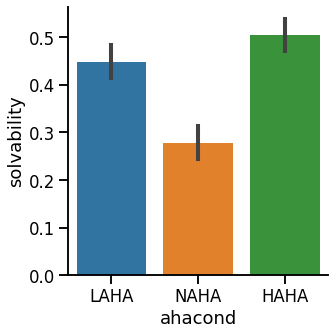

In [5]:
sns.catplot(x="ahacond", y="solvability", kind="bar",units="subject", data=solvdf);


In [184]:
# model formulation
fml = "solvability ~ ahacond"

model = sm.OLS.from_formula(fml, solvdf)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            solvability   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     155.0
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           9.50e-67
Time:                        18:25:48   Log-Likelihood:                -5337.2
No. Observations:                7740   AIC:                         1.068e+04
Df Residuals:                    7737   BIC:                         1.070e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5043      0.009     

In [185]:
# model formulation
fml = "solvability ~ ahacond"

# covariance structure
ex = sm.cov_struct.Exchangeable()
fa = sm.families.Binomial(sm.families.links.logit)


model = sm.GEE.from_formula(fml, "subject", solvdf, cov_struct=ex, family=fa)
result = model.fit()
print(result.summary())
print(result.cov_struct.summary())

                               GEE Regression Results                              
Dep. Variable:                 solvability   No. Observations:                 7740
Model:                                 GEE   No. clusters:                      129
Method:                        Generalized   Min. cluster size:                  60
                      Estimating Equations   Max. cluster size:                  60
Family:                           Binomial   Mean cluster size:                60.0
Dependence structure:         Exchangeable   Num. iterations:                     2
Date:                     Fri, 10 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         18:25:54
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0171      0.059      0.287      0.774      -0.099     

In [8]:
#correct rts for trials where they responded during question
df[df.test_part=='affect'][['rt']]= df[df.test_part=='affect'][['rt']]+500

len(df)

15480

In [9]:
# add rt from while target was on
df['rtproper']= np.where((df.test_part=='affect') & (df.rt.isnull()),df.rt.shift(1), df.rt)

In [10]:
df[(df.test_part=='affect') & (df.rt.isnull())]

df.iloc[ 50:80 , : ].rtproper

58         NaN
59      23.570
60      99.570
61      99.570
62     126.270
63     126.270
64     126.080
65     126.080
66      49.765
67      49.765
68      65.715
69      65.715
70     168.545
71     168.545
72      88.260
73      88.260
74     118.075
75     118.075
76         NaN
77     379.985
78      31.115
79      31.115
80     205.600
81     205.600
82         NaN
83    1424.425
84         NaN
85     493.590
86         NaN
87    1359.075
Name: rtproper, dtype: float64

In [11]:
# select affect part only
df = df[df.test_part=='affect']
df.rt = df.rtproper
len(df)

7740

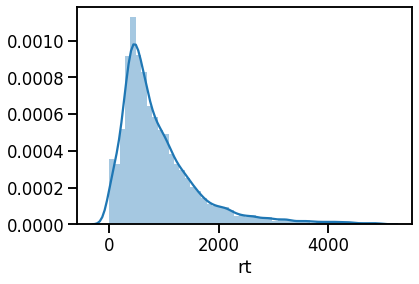

In [12]:
sns.distplot(df.rt[df.rt<5000])

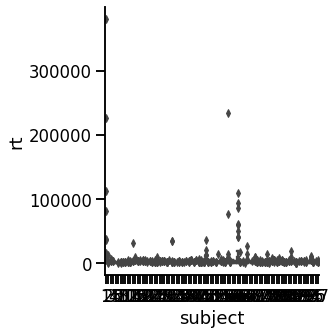

In [99]:
ax= sns.catplot(x="subject", y="rt", kind="box", data=df); #


In [13]:
df.rt.mean()

1318.298116536257

In [14]:
m = df.groupby('subject').rt.mean().reset_index()

m[m.rt>3000]

,subject,rt
1,2,15785.284833
24,28,3561.675000
64,71,5030.441667
74,82,6765.490917
78,86,11863.983333
96,107,9243.864783


In [15]:
df = df[~df.subject.isin([2,28,71,82,86,107])]

In [16]:
print('nb of participants:', len(df['subject'].unique()))

nb of participants: 123


In [17]:
countsBefore = df.rt.count()

#df = df[df.rt<(df.rt.mean()+(df.rt.std()*3))] # remove very high rts
#df = df[df.rt>100] # remove implausibly low rts

def is_outlier(s):
    upper_limit = s.mean() + (s.std() * 3)
    return (s > upper_limit)

df = df[~df.groupby('subject')['rt'].apply(is_outlier)]

countsAfter = df.rt.count()

In [18]:
countsAfter = df.rt.count()

print(countsBefore, countsBefore-countsAfter, ((countsBefore-countsAfter)/countsBefore)*100)



7380 149 2.0189701897018972


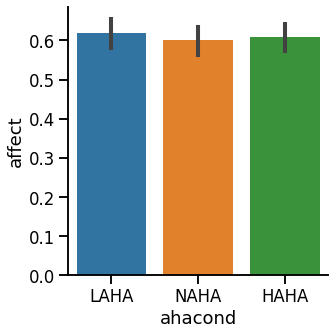

In [19]:
sns.catplot(x="ahacond", y="affect", kind="bar",units="subject", data=df);


In [179]:
# model formulation
fml = "affect ~ ahacond"

# covariance structure
ex = sm.cov_struct.Exchangeable()
fa = sm.families.Binomial(sm.families.links.logit)


model = sm.GEE.from_formula(fml, "subject", df, cov_struct=ex, family=fa)
result = model.fit()
print(result.summary())
print(result.cov_struct.summary())

                               GEE Regression Results                              
Dep. Variable:                      affect   No. Observations:                 7231
Model:                                 GEE   No. clusters:                      123
Method:                        Generalized   Min. cluster size:                  57
                      Estimating Equations   Max. cluster size:                  60
Family:                           Binomial   Mean cluster size:                58.8
Dependence structure:         Exchangeable   Num. iterations:                     4
Date:                     Fri, 10 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         18:23:58
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4406      0.065      6.787      0.000       0.313     

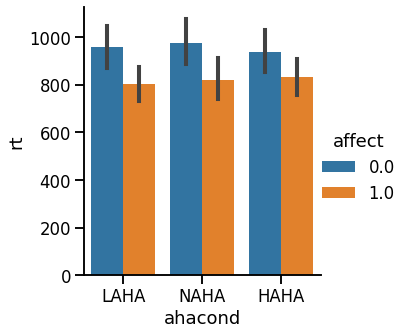

In [20]:
sns.catplot(x="ahacond", y="rt",hue='affect', kind="bar",units="subject", data=df);


In [21]:
df["affectcat"] = df["affect"].astype('category')


# model formulation
fml = "rt ~ ahacond*affectcat"

model = sm.OLS.from_formula(fml, df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     rt   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     15.11
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           8.64e-15
Time:                        20:07:06   Log-Likelihood:                -57388.
No. Observations:                7231   AIC:                         1.148e+05
Df Residuals:                    7225   BIC:                         1.148e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [22]:
# model formulation
fml = "rt ~ ahacond*affectcat"

# covariance structure
ex = sm.cov_struct.Exchangeable()


model = sm.GEE.from_formula(fml, "subject", df, cov_struct=ex)
result = model.fit()
print(result.summary())
print(result.cov_struct.summary())

                               GEE Regression Results                              
Dep. Variable:                          rt   No. Observations:                 7231
Model:                                 GEE   No. clusters:                      123
Method:                        Generalized   Min. cluster size:                  57
                      Estimating Equations   Max. cluster size:                  60
Family:                           Gaussian   Mean cluster size:                58.8
Dependence structure:         Exchangeable   Num. iterations:                     6
Date:                     Thu, 16 Jul 2020   Scale:                      459487.128
Covariance type:                    robust   Time:                         20:07:27
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          908.979

In [23]:
s = solvdf[['solvability', 'currentStim', 'subject']]

In [24]:
df = df.merge(s, how='left', on=['subject', 'currentStim'])

In [25]:
df['solvability'] = df.solvability_y
df = df.drop(columns=['solvability_x', 'solvability_y'])

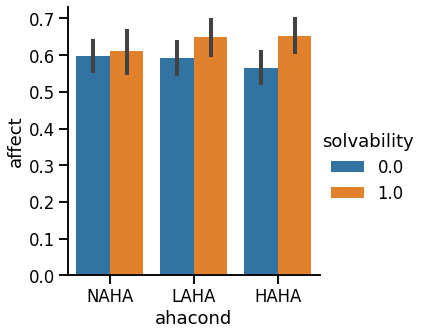

In [26]:
sns.catplot(x="ahacond", y="affect",hue='solvability', kind="bar",units="subject", data=df, order=['NAHA', 'LAHA', 'HAHA']);


In [31]:
# model formulation
fml = "affect ~ ahacond*solvability"

# covariance structure
ex = sm.cov_struct.Exchangeable()
fa = sm.families.Binomial(sm.families.links.logit)


model = sm.GEE.from_formula(fml, "subject", df, cov_struct=ex, family=fa)
result = model.fit()
print(result.summary())
print(result.cov_struct.summary())

                               GEE Regression Results                              
Dep. Variable:                      affect   No. Observations:                 7231
Model:                                 GEE   No. clusters:                      123
Method:                        Generalized   Min. cluster size:                  57
                      Estimating Equations   Max. cluster size:                  60
Family:                           Binomial   Mean cluster size:                58.8
Dependence structure:         Exchangeable   Num. iterations:                     5
Date:                     Thu, 16 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         20:10:43
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.2841      0.074   

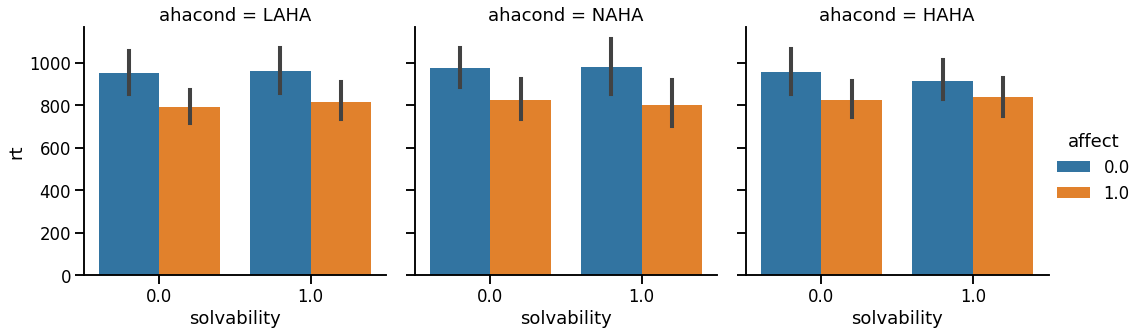

In [28]:
sns.catplot(x="solvability", y="rt",hue='affect', col='ahacond', kind="bar",units="subject", data=df);


In [29]:
# model formulation
fml = "rt ~ ahacond*affectcat*solvability"

# covariance structure
ex = sm.cov_struct.Exchangeable()


model = sm.GEE.from_formula(fml, "subject", df, cov_struct=ex)
result = model.fit()
print(result.summary())
print(result.cov_struct.summary())

                               GEE Regression Results                              
Dep. Variable:                          rt   No. Observations:                 7231
Model:                                 GEE   No. clusters:                      123
Method:                        Generalized   Min. cluster size:                  57
                      Estimating Equations   Max. cluster size:                  60
Family:                           Gaussian   Mean cluster size:                58.8
Dependence structure:         Exchangeable   Num. iterations:                     6
Date:                     Thu, 16 Jul 2020   Scale:                      459989.331
Covariance type:                    robust   Time:                         20:09:19
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept         

In [30]:
df["affectcat"] = df["affect"].astype('category')


# model formulation
fml = "rt ~ ahacond*affectcat*solvability"

model = sm.OLS.from_formula(fml, df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     rt   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     7.016
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           6.08e-12
Time:                        20:09:47   Log-Likelihood:                -57387.
No. Observations:                7231   AIC:                         1.148e+05
Df Residuals:                    7219   BIC:                         1.149e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------